#Space Missions Analysis

***
## Authorship and Resources Used
* Ali Khatai


***
## Data Description and Source
* I selected a Dataset from Kaggle that contains Data on Space Exploration by country and decade. This Dataset has data on the timeline of artificial Satellites and Space probes from 1957 to 2022 by country. This includes uncrewed Spacecraft including technology demonstrators, observatories, lunar probes, and interplanetary probes. First satellites from each country are included. Not included are most Earth science satellites, commercial satellites or crewed missions.
* I found the Dataset on Kaggle: [Link.](https://www.kaggle.com/datasets/bharatmahindra/space-exploration-by-decade) by BHARAT MAHINDRA.
The original source of the Data as stated on the Kaggle page is Wikipedia, [Link.](https://en.wikipedia.org/wiki/Timeline_of_artificial_satellites_and_space_probes)

***
## Import Libraries and Set Preferences for Visualization

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# add any additional libraries or plot preferences to this block

***
## Read and Verify Data


In [ ]:
# enter and test your code here

# install Kaggle
! pip install -q kaggle

from google.colab import files
files.upload()

# make kaggle directory and move the file
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

# API command for the dataset
! kaggle datasets download -d bharatmahindra/space-exploration-by-decade

# unzip the data
! mkdir kaggledata
! unzip space-exploration-by-decade -d kaggledata

mkdir: cannot create directory ‘/root/.kaggle’: File exists
space-exploration-by-decade.zip: Skipping, found more recently modified local copy (use --force to force download)
mkdir: cannot create directory ‘kaggledata’: File exists
Archive:  space-exploration-by-decade.zip
replace kaggledata/SpaceExploration(ByCountry).csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
# Create the dataFrame from the CSV file
df = pd.read_csv('/content/kaggledata/SpaceExploration(ByCountry).csv', encoding= 'unicode_escape')

In [ ]:
# Examine the data frames
print(df.info())
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 283 entries, 0 to 282
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Country      283 non-null    object
 1   Decade       283 non-null    int64 
 2   Year         283 non-null    object
 3   Name         283 non-null    object
 4   Target       283 non-null    object
 5   Status       279 non-null    object
 6   Description  279 non-null    object
dtypes: int64(1), object(6)
memory usage: 15.6+ KB
None


,Country,Decade,Year,Name,Target,Status,Description
0,Soviet Union,1950,04-10-1957,Sputnik 1,First Ever!,S,The first human-made object to orbit Earth.
1,Soviet Union,1950,03-11-1957,Sputnik 2,"Laika, the dog",S,"The first satellite to carry a living animal, ..."
2,US,1950,01-02-1958,Explorer 1,First Human,S,The first American satellite in space.[1]
3,US,1950,17-03-1958,Vanguard 1C,Earth,S,"Vanguard 1. Expected to de-orbit in ~2240AD, t..."
4,US,1950,26-03-1958,Explorer 3,Earth,S,Added to data received by Explorer 1.[1]
...,...,...,...,...,...,...,...
278,Egypt,2010,2019,NARSSCube-2,Earth,S,"NARSSCube-2, Egypt's first domestically built ..."
279,Israel,2010,2019,Beresheet,Moon,F,"Beresheet, first private space probe and moon ..."
280,"EU, Russia",2010,2019,Spektr-RG,Earth-Sun L2,S,Launch of the Spektr-RG X-ray observatory
281,India,2010,2019,Chandrayaan-2,Moon,P.S.,"Chandrayaan-2, orbiter achieved orbit, but lan..."


***
## Analyses and Visualizations
## Number of Space misssion by country
We can start by creating a visualization that shows how many space mission were conduction by each country.

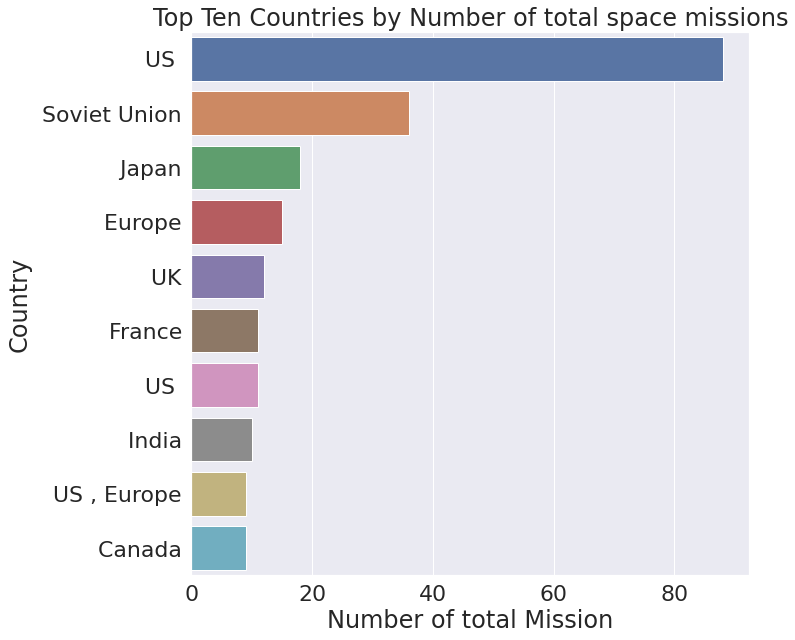

In [ ]:
# Group the data by country and use .count to count the number of mission
# vertical barplot is used so that the country names are visible.
sns.set(font_scale=2)
plt.figure(figsize=(10,10))
df_grouped_count =  df.groupby(by='Country').count().reset_index().sort_values(by='Decade',ascending = False)
sns.barplot(x = "Decade",
            y = "Country",
            data = df_grouped_count.head(10))
plt.xlabel("Number of total Mission")
plt.title("Top Ten Countries by Number of total space missions")
plt.show()

In the Chart above we can see the Number of Space missions conducted by each country. The US and the Soviet Union lead this this which is not a surprise. We can also see from the list of countries that many of the mission conducted by other countries we in collaboration with the US. We can produce another bar chart that compares these.

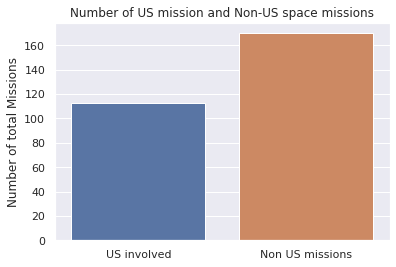

In [ ]:
sns.set(font_scale=1)
US_involvement = df_grouped_count.loc[df_grouped_count.loc[:, 'Country'].str.contains('US')].loc[:,"Decade"].sum()
non_US = df_grouped_count.loc[:,"Decade"].sum() - US_involvement
series = pd.Series(data = [US_involvement, non_US], index = ["US involved", "Non US missions"])
sns.barplot(x = series.index,
            y = series.values)
plt.ylabel("Number of total Missions")
plt.title("Number of US mission and Non-US space missions")
plt.show()

The Chart above shows the total number of Space mission the US was involved in in blue and the orange bar shows total number of space mission in which the US had no involvement. We can see that although the US was involved in the most missions, it's still not greater the than total combined number of mission by every other country.

## Space missions over the years
Another interesting thing would be to look at how the number of space mission have changed over the years. We can also compare the number of failed, successful and partial successful space mission over the years as well in the same visualization.

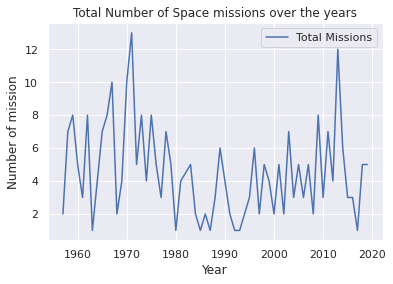

In [ ]:
# In the data set, the year column contains the whole date, so we will create a new column that contains only the year
df.loc[:,"Year_only"] = df.loc[:,"Year"].str[-4:].astype(int)

# grou[ by year total mission, successful mission, failed and partial successful missions
df_grouped_year = df.groupby(by='Year_only').count().reset_index()
sns.lineplot(x = "Year_only", y = "Country", data = df_grouped_year, label = "Total Missions")

plt.title("Total Number of Space missions over the years")
plt.ylabel("Number of mission")
plt.xlabel("Year")
plt.show()

We can see above the total number of Space mission over the years. Space mission we at their peak from the 1960's to the 1970's. This can be attributed to the fact that both the US and Soviet Union were in a race to reach outer space and the moon at this time, so there were alot of mission conducted during this time. Then during the 1980's and 90's, number of missions were much lower, but then we again saw a rise and a peak until the 2010's which is due to increased space exploration attempts. The plot look very spiky which is usually a bad sign, but in this case is make sense since the number of space mission each year could vary by alot. Some year there could be zero mission and the next there could be several.

Since the mission to the moon were a pretty big thing during the 70's, we can look at how the number of space mission to the moon have changed over the years.

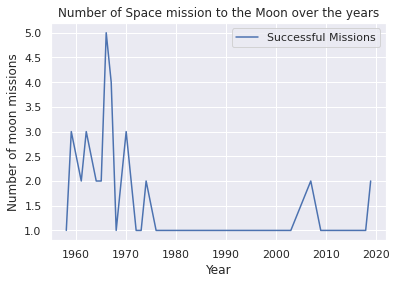

In [ ]:
# get all rows with target equal Moon and group by year and get the counts
df_group_moon = df.loc[df.loc[:, 'Target'] == "Moon"].groupby(by='Year_only').count().reset_index()

# make the plot
sns.lineplot(x = "Year_only", y = "Country", data = df_group_moon,  label = "Successful Missions")

# set title and labels and display the chart
plt.title("Number of Space mission to the Moon over the years")
plt.ylabel("Number of moon missions")
plt.xlabel("Year")
plt.show()

The plot shows what we expected to see. Almost all the moon mission took place during the 60's and 70's after which there were Moon until a few more during 2000's and 2010's

The dataset also tell us whetler a particular mission was successful, partially successful or a complete failure. We can plot this information and see how the number of successful, partially successful and failed mission has changed over the years

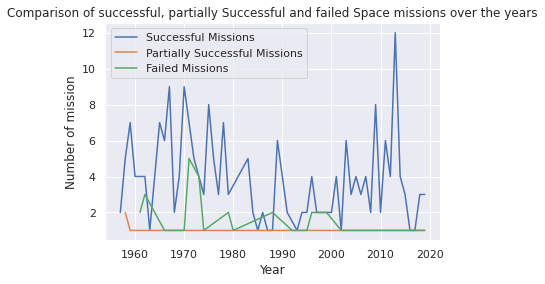

In [ ]:
# create masks that mask the data by success status, group each by the year and get the total counts for each year
df_success_year = df.loc[df.loc[:,"Status"] == "S"].groupby(by='Year_only').count().reset_index()
df_psuccess_year = df.loc[df.loc[:,"Status"] == "P.S."].groupby(by='Year_only').count().reset_index()
df_failed_year = df.loc[df.loc[:,"Status"] == "F"].groupby(by='Year_only').count().reset_index()

# make the plots
sns.lineplot(x = "Year_only", y = "Country", data = df_success_year,  label = "Successful Missions")
sns.lineplot(x = "Year_only", y = "Country", data = df_psuccess_year,  label = "Partially Successful Missions")
sns.lineplot(x = "Year_only", y = "Country", data = df_failed_year,  label = "Failed Missions")

# set title and labels and display the chart
plt.title("Comparison of successful, partially Successful and failed Space missions over the years")
plt.ylabel("Number of mission")
plt.xlabel("Year")
plt.show()

We can see that most of the missions over the years were successful. The most amount of failed mission were during the 1970's and there were only a few partially successful missions before the 1960's and non after that.

---
---